Install the required modules.
We need reverse geocoder module to reverse geocoding of latitude and longitude

In [1]:
!pip install reverse_geocoder

     |████████████████████████████████| 2.3MB 2.8MB/s 
  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-cp36-none-any.whl size=2268091 sha256=11d2560d4e4baeadd22b012e029ea002c410a20dcce0adff7a04faf92725306e
  Stored in directory: /root/.cache/pip/wheels/47/05/50/b1350ff094ef91e082665b4a2f9ca551f8acea4aa55d796b26
Successfully built reverse-geocoder


import the required libraries

In [0]:
import numpy as np
import pandas as pd
from time import time
import io 
import csv
import pprint as pp
import reverse_geocoder as rg 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

Load the dataset.  
There are multiple dataset files so load and concat the dataset files

In [3]:
# importing the dataset from csv files
data = pd.concat([pd.read_csv('CallVoiceQuality_Data_2018_April.csv' ), pd.read_csv('CallVoiceQuality_Data_2018_May.csv' )])

data.describe()

,Rating,Latitude,Longitude
count,95317.000000,95317.000000,95317.000000
mean,3.465499,15.221703,57.940569
std,1.451786,10.761106,35.054858
min,1.000000,-1.000000,-73.982452
25%,2.000000,-1.000000,-1.000000
50%,4.000000,18.517141,76.660720
75%,5.000000,23.161592,78.476857
max,5.000000,40.756409,103.984169


read the csv files and do the reverse geocoding of the latitude and longitde
Replace the result reverse geocode result in the existing column 'State Name'

In [4]:
input_filename1 = 'CallVoiceQuality_Data_2018_May.csv'
input_filename2 = 'CallVoiceQuality_Data_2018_April.csv'

def reverseGeocode(input_filename):
    cities = [(row[5],row[6]) for row in csv.reader(open(input_filename,'rt'),delimiter=',')]
   
    #pp.pprint(cities[0:5])
    results = rg.search(cities[1:])
    city_loc = list()
    for k in results:
       city_loc.append(k['admin2'])
    #print(len(city_loc))
    return city_loc

april_list= reverseGeocode(input_filename2)
may_list= reverseGeocode(input_filename1)

final_list= april_list + may_list

print(len(data))
print(len(final_list))

data['State Name']= final_list

display(data.head(15))
display(data.shape)


Loading formatted geocoded file...
95317
95317


,Operator,Indoor_Outdoor_Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,Airtel,Indoor,3G,5,Satisfactory,28.422966,76.912324,Gurgaon
1,RJio,Indoor,4G,4,Satisfactory,11.158358,77.301897,Tiruppur
2,Airtel,Outdoor,3G,5,Satisfactory,28.422931,76.912253,Gurgaon
3,Airtel,Travelling,3G,5,Satisfactory,28.422947,76.912260,Gurgaon
4,RJio,Indoor,4G,5,Satisfactory,25.625990,85.094294,Patna
5,RJio,Travelling,4G,4,Satisfactory,14.913321,79.993797,Nellore
6,Airtel,Travelling,4G,1,Satisfactory,19.937326,73.536190,Nashik Division
7,RJio,Outdoor,4G,4,Satisfactory,26.892033,75.725724,Jaipur
8,RJio,Indoor,4G,5,Satisfactory,20.287829,85.864832,Khordha
9,RJio,Indoor,4G,2,Satisfactory,9.426251,77.802405,Virudhunagar


(95317, 8)

Droping the records with latitude and longitude of 0 or -1 Also droping the 'Rating column'

In [5]:
# drop the rows with laititude 0 or -1
data.dropna(inplace=True)

if 'Rating' in data.columns:
     data = data.drop('Rating' ,axis=1)

display(data.head(10))


,Operator,Indoor_Outdoor_Travelling,Network Type,Call Drop Category,Latitude,Longitude,State Name
0,Airtel,Indoor,3G,Satisfactory,28.422966,76.912324,Gurgaon
1,RJio,Indoor,4G,Satisfactory,11.158358,77.301897,Tiruppur
2,Airtel,Outdoor,3G,Satisfactory,28.422931,76.912253,Gurgaon
3,Airtel,Travelling,3G,Satisfactory,28.422947,76.912260,Gurgaon
4,RJio,Indoor,4G,Satisfactory,25.625990,85.094294,Patna
5,RJio,Travelling,4G,Satisfactory,14.913321,79.993797,Nellore
6,Airtel,Travelling,4G,Satisfactory,19.937326,73.536190,Nashik Division
7,RJio,Outdoor,4G,Satisfactory,26.892033,75.725724,Jaipur
8,RJio,Indoor,4G,Satisfactory,20.287829,85.864832,Khordha
9,RJio,Indoor,4G,Satisfactory,9.426251,77.802405,Virudhunagar


printing the number of records present in the dataset  and records with good voice quality and records with poor voice quality

In [6]:
records = data.shape[0]

# number of records where voice quality is satisfactory
good_quality_records = data.loc[data['Call Drop Category'] == 'Satisfactory'].shape[0]

#number of records where voice quality is poor considering poor voice quality and call dropped category
poor_quality_records = data.loc[(data['Call Drop Category'] == 'Poor Voice Quality') | (data['Call Drop Category' ] == 'Call Dropped')| (data['Call Drop Category' ] == 'Poor Network')].shape[0]
#call_dropped_records = data.loc[ data['Call Drop Category' ] == 'Call Dropped' ].shape[0]

# TODO: Percentage of records with good voice quality
good_voice_quality_percent = good_quality_records/records *100

# Print the results
print("Total number of records: {}".format(records))
print("Records with good voice quality : {}".format(good_quality_records))
print("Records with poor voice quality: {}".format(poor_quality_records))
#print("Percentage of records with good voice quality: {}%".format(good_voice_quality_percent))

Total number of records: 95317
Records with good voice quality : 68977
Records with poor voice quality: 26340


RJio        39220
Airtel      22540
Vodafone    12510
BSNL        11612
Idea         8559
Tata          421
RComm         219
MTNL          144
Telenor        47
Other          45
Name: Operator, dtype: int64


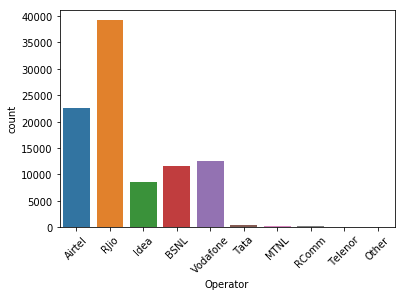

In [8]:
Operator = sns.countplot(data['Operator'], label="Count")

for item in Operator.get_xticklabels():
    item.set_rotation(45)


print(data['Operator'].value_counts())


Indoor        63688
Outdoor       22423
Travelling     9206
Name: Indoor_Outdoor_Travelling, dtype: int64


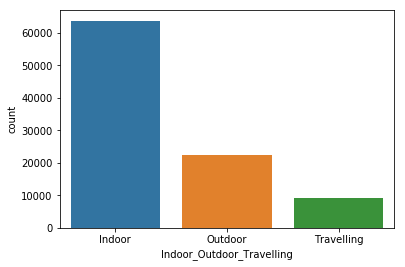

In [9]:
IndoorOutdoor = sns.countplot(data['Indoor_Outdoor_Travelling'], label="Count")

print(data['Indoor_Outdoor_Travelling'].value_counts())

4G         52400
3G         19151
Unknown    18243
2G          5523
Name: Network Type, dtype: int64


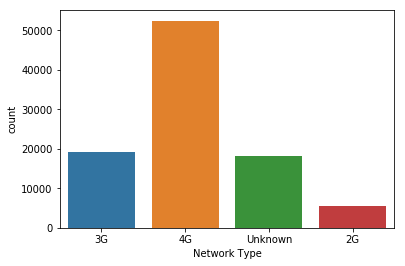

In [10]:
networkType = sns.countplot(data['Network Type'], label="Count")

print(data['Network Type'].value_counts())

Dropong the target label column and well as latitude and longitude columns
Converting the target classes values inot numeric values.

Printing the count of all each type of target value and the barplot praph as well


Number of Satisfactory:  68977
Number of Poor NetWork :  11257
Number of Call Dropped:  7660
Number of Poor Voice Quality:  7423


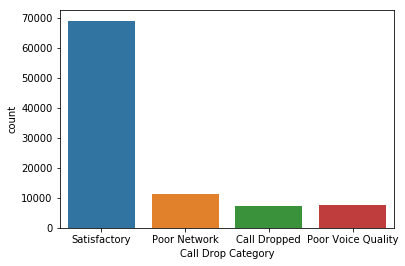

In [11]:
if 'Call Drop Category' in data.columns:
    voice_quality_raw = data['Call Drop Category']
    data = data.drop('Latitude' ,axis=1)
    data = data.drop('Longitude' ,axis=1)
    
    data = data.drop('Call Drop Category' ,axis=1)
    
voice_quality = voice_quality_raw.map(lambda x: 0 if x != "Satisfactory" else 1)
voice_quality.head(15)

ax = sns.countplot(voice_quality_raw, label="Count")      
Satisfactory, PoorNetWork, CallDropped, PoorVoiceQuality = voice_quality_raw.value_counts()
print('Number of Satisfactory: ',Satisfactory)
print('Number of Poor NetWork : ',PoorNetWork)
print('Number of Call Dropped: ',CallDropped)
print('Number of Poor Voice Quality: ',PoorVoiceQuality)


does the one hot encoding for the columns which has categorical values

In [12]:
final_data = pd.get_dummies(data)
final_data.head()


# Print the number of features after one-hot encoding
encoded = list(final_data.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

print(encoded)

453 total features after one-hot encoding.
['Operator_Airtel', 'Operator_BSNL', 'Operator_Idea', 'Operator_MTNL', 'Operator_Other', 'Operator_RComm', 'Operator_RJio', 'Operator_Tata', 'Operator_Telenor', 'Operator_Vodafone', 'Indoor_Outdoor_Travelling_Indoor', 'Indoor_Outdoor_Travelling_Outdoor', 'Indoor_Outdoor_Travelling_Travelling', 'Network Type_2G', 'Network Type_3G', 'Network Type_4G', 'Network Type_Unknown', 'State Name_', 'State Name_Adilabad', 'State Name_Agra', 'State Name_Ahmadabad', 'State Name_Ahmadnagar', 'State Name_Ajitgarh', 'State Name_Ajmer', 'State Name_Akola', 'State Name_Alappuzha', 'State Name_Aligarh', 'State Name_Allahabad', 'State Name_Almora', 'State Name_Alwar', 'State Name_Ambala', 'State Name_Amravati Division', 'State Name_Amreli', 'State Name_Amritsar', 'State Name_Anand', 'State Name_Anantapur', 'State Name_Anantnag', 'State Name_Angul District', 'State Name_Araria', 'State Name_Aurangabad', 'State Name_Aurangabad Division', 'State Name_Baghpat', 'State

split the data set into  training and testing set.  distribution ration is 80:20

In [13]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_data, 
                                                    voice_quality, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 76253 samples.
Testing set has 19064 samples.


define the method for trainign and predicting the target class based on sample size , algorithm provided and training and testing data provided

In [0]:


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
       
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end- start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end- start
            
    # Compute accuracy on the first training samples which is y_train]
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    #  Compute F-score on the the training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train ,predictions_train , 0.5 )
        
    # Compute F-score on the test set which is y_test
    results['f_test'] =  fbeta_score(y_test, predictions_test,0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

Build models  amd train train and prediction calculation with sample sizes 1% , 10%  and 100% 

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize the three models
clf_A = DecisionTreeClassifier(random_state=42)
clf_B =  RandomForestClassifier( random_state=42)
clf_C = XGBClassifier()

# Calculate the number of samples for 1%, 10%, and 100% of the training data

samples_100 = len(X_train)
samples_10 = int(len(X_train)/10)
samples_1 = int(len(X_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)
        print(results[clf_name][i])



DecisionTreeClassifier trained on 762 samples.
{'train_time': 0.02425408363342285, 'pred_time': 0.19604039192199707, 'acc_train': 0.7079983738344721, 'acc_test': 0.7103441040704994, 'f_train': 0.7871348400332311, 'f_test': 0.7881303146834209}
DecisionTreeClassifier trained on 7625 samples.
{'train_time': 0.297313928604126, 'pred_time': 0.13411951065063477, 'acc_train': 0.7668944172688288, 'acc_test': 0.7654217373059169, 'f_train': 0.817220509381196, 'f_test': 0.8156410789460008}
DecisionTreeClassifier trained on 76253 samples.
{'train_time': 9.252082824707031, 'pred_time': 0.14814472198486328, 'acc_train': 0.8001258966860321, 'acc_test': 0.7869806966009232, 'f_train': 0.8334422675317636, 'f_test': 0.824786216023618}


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier trained on 762 samples.
{'train_time': 0.04154682159423828, 'pred_time': 0.4431014060974121, 'acc_train': 0.7188963057191192, 'acc_test': 0.7207826269408308, 'f_train': 0.7877448501949015, 'f_test': 0.7884655477952672}
RandomForestClassifier trained on 7625 samples.
{'train_time': 0.35094690322875977, 'pred_time': 0.6293113231658936, 'acc_train': 0.7673403013651922, 'acc_test': 0.7648971884179605, 'f_train': 0.811677343377545, 'f_test': 0.8098778209723835}
RandomForestClassifier trained on 76253 samples.
{'train_time': 6.338521718978882, 'pred_time': 0.7021021842956543, 'acc_train': 0.7994177278271019, 'acc_test': 0.7875052454888796, 'f_train': 0.8313434393591014, 'f_test': 0.8231476814516129}
XGBClassifier trained on 762 samples.
{'train_time': 1.047250747680664, 'pred_time': 1.4019627571105957, 'acc_train': 0.7293614677455313, 'acc_test': 0.7300146873688628, 'f_train': 0.7746346865384116, 'f_test': 0.7748315332779471}
XGBClassifier trained on 7625 samples.
{'tr

Define helper methods to draw the bar graphs based on the results obtained from model evaluation in previous step

In [16]:


def getDataList(alorithm, value , results ):
    list = []
    for i in range(0, 3):   
          list.append(results[alorithm][i][value])
     
    return list



def barplot(xLabel, yLabel, title , decisionTreeData, randomForestData, xgbData, n_groups=3 ):
  
    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.25
    opacity = 0.8
    
    rects1 = plt.bar(index, decisionTreeData, bar_width,
    alpha=opacity,
    color='b',
    label= 'DecisionTreeClassifier')
  
    rects2 = plt.bar(index + bar_width, randomForestData, bar_width,
    alpha=opacity,
    color='g',
    label= 'RandomForestClassifier')
    
    rects3 = plt.bar(index + (2*bar_width), xgbData, bar_width,
    alpha=opacity,
    color='R',
    label= 'XGBClassifier')

    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    plt.xticks(index + bar_width, ('1%', '10%', '100'))
    plt.legend()
  
    plt.tight_layout()
    plt.show()
    
results[clf_name][i]



{'acc_test': 0.7479542593369702,
 'acc_train': 0.7482197421740784,
 'f_test': 0.7829043446513325,
 'f_train': 0.7830873867738783,
 'pred_time': 1.2052404880523682,
 'train_time': 81.34712839126587}

Draw the graph using prevoisly defined methods and models evaluation result

[0.7079983738344721, 0.7668944172688288, 0.8001258966860321]
[0.7188963057191192, 0.7673403013651922, 0.7994177278271019]
[0.7293614677455313, 0.7421740783969155, 0.7482197421740784]


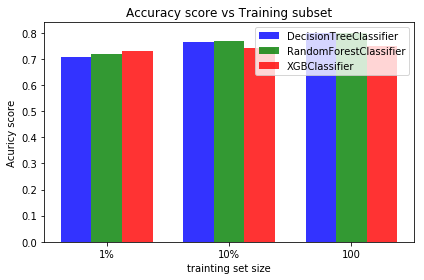

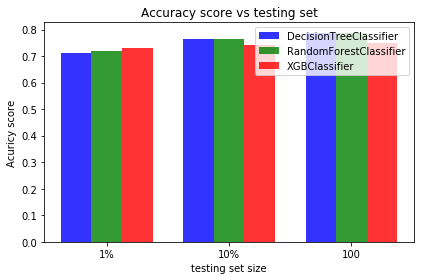

In [17]:
decisionTreeAccuTrainScores = getDataList('DecisionTreeClassifier' , 'acc_train', results)
randomForestAccuTrainScores = getDataList('RandomForestClassifier' , 'acc_train', results)
xgbAccuTrainScores = getDataList('XGBClassifier' , 'acc_train', results)



decisionTreeAccuTestScores = getDataList('DecisionTreeClassifier' , 'acc_test', results)
randomForestAccuTestScores = getDataList('RandomForestClassifier' , 'acc_test', results)
xgbAccuTestScores = getDataList('XGBClassifier' , 'acc_test', results)

print(decisionTreeAccuTrainScores)
print(randomForestAccuTrainScores)
print(xgbAccuTrainScores)

barplot('trainting set size' , 'Acuricy score', 'Accuracy score vs Training subset' , decisionTreeAccuTrainScores ,randomForestAccuTrainScores ,xgbAccuTrainScores )
barplot('testing set size' , 'Acuricy score', 'Accuracy score vs testing set' , decisionTreeAccuTestScores ,randomForestAccuTestScores , xgbAccuTestScores )

[0.7871348400332311, 0.817220509381196, 0.8334422675317636]
[0.7877448501949015, 0.811677343377545, 0.8313434393591014]
[0.7877448501949015, 0.811677343377545, 0.8313434393591014]


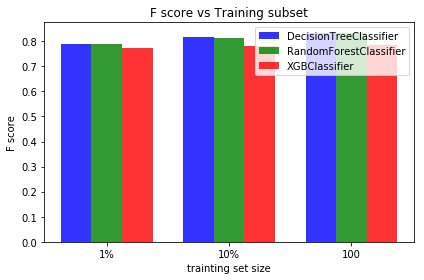

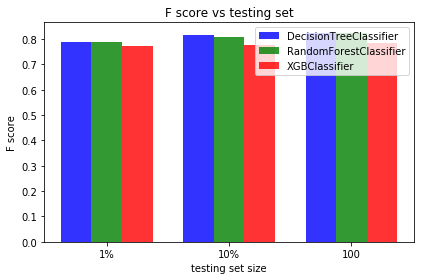

In [18]:
decisionTreeTrainFScores = getDataList('DecisionTreeClassifier' , 'f_train', results)
randomForestTrainFScores = getDataList('RandomForestClassifier' , 'f_train', results)
xgbTrainFScores = getDataList('XGBClassifier' , 'f_train', results)

decisionTreeTestFScores = getDataList('DecisionTreeClassifier' , 'f_test', results)
randomForestTestFScores = getDataList('RandomForestClassifier' , 'f_test', results)
xgbTestFScores = getDataList('XGBClassifier' , 'f_test', results)

print(decisionTreeTrainFScores)
print(randomForestTrainFScores)
print(randomForestTrainFScores)

barplot('trainting set size' , 'F score', 'F score vs Training subset' , decisionTreeTrainFScores ,randomForestTrainFScores, xgbTrainFScores )
barplot('testing set size' , 'F score', 'F score vs testing set' , decisionTreeTestFScores ,randomForestTestFScores, xgbTestFScores )


Model optimization for the selected model using different hyper parameters

In [19]:
# finding the optimized model based on parameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the classifier
clf = RandomForestClassifier( random_state=42)

#  Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'max_depth': [100 , 150, 180], 'n_estimators': [10, 20, 30], 'min_samples_split': [2, 4,6]} 

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

print(best_clf)

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=180, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.7875
F-score on testing data: 0.8231

Optimized Model
------
Final accuracy score on the testing data: 0.7882
Final F-score on the testing data: 0.8241


printing important features of the model 

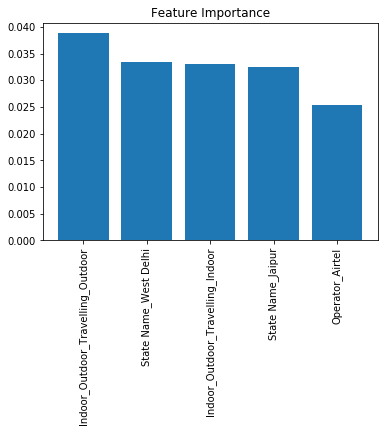

In [20]:
importances = best_clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns.values[i] for i in indices[:5]]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(np.arange(5), importances[indices][:5])

# Add feature names as x-axis labels
plt.xticks(np.arange(5), names, rotation=90)

# Show plot
plt.show()


Completed 